In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import time
import tqdm

plt.rcParams.update({'font.size': 18})

In [2]:
# h5_file = "20240626-075959_pluto_DTV.h5"
# h5_file = "20240626-081158_pluto_DTV.h5"
h5_file = "20240626-083308_pluto_DTV.h5"
NFFT = 2048
print ("Reading",h5_file)
with h5py.File(h5_file, 'r') as hf: 
    fc = hf["data"].attrs['fc']
    fs = hf["data"].attrs['fs']
    c  = hf["data"].attrs['c']
    len_data = hf["data/timestamps"][()].shape[0]
    print (len_data)
    Nsamp = int(c)

    auto11 = np.zeros([int(Nsamp/NFFT),NFFT], dtype=np.complex64)
    auto22 = np.zeros([int(Nsamp/NFFT),NFFT], dtype=np.complex64)
    cross12 = np.zeros([int(Nsamp/NFFT),NFFT], dtype=np.complex64)

    a = hf["data/samples"][0][0][:]
    b = hf["data/samples"][0][1][:]

    for j in tqdm.tqdm(range(int(Nsamp/NFFT))):
        c1_fft = np.fft.fft(a[j*NFFT:(j+1)*NFFT])
        c2_fft = np.fft.fft(b[j*NFFT:(j+1)*NFFT])
        auto11[j,:] = np.fft.fftshift(c1_fft*np.conj(c1_fft))
        auto22[j,:] = np.fft.fftshift(c2_fft*np.conj(c2_fft))
        cross12[j,:] = np.fft.fftshift(c1_fft*np.conj(c2_fft))

freqs = np.fft.fftshift(np.fft.fftfreq(NFFT, 1/fs)+fc)

Reading 20240626-083308_pluto_DTV.h5
1


100%|██████████| 32768/32768 [00:06<00:00, 4727.60it/s]


Text(0.5, 0, 'Freq (MHz)')

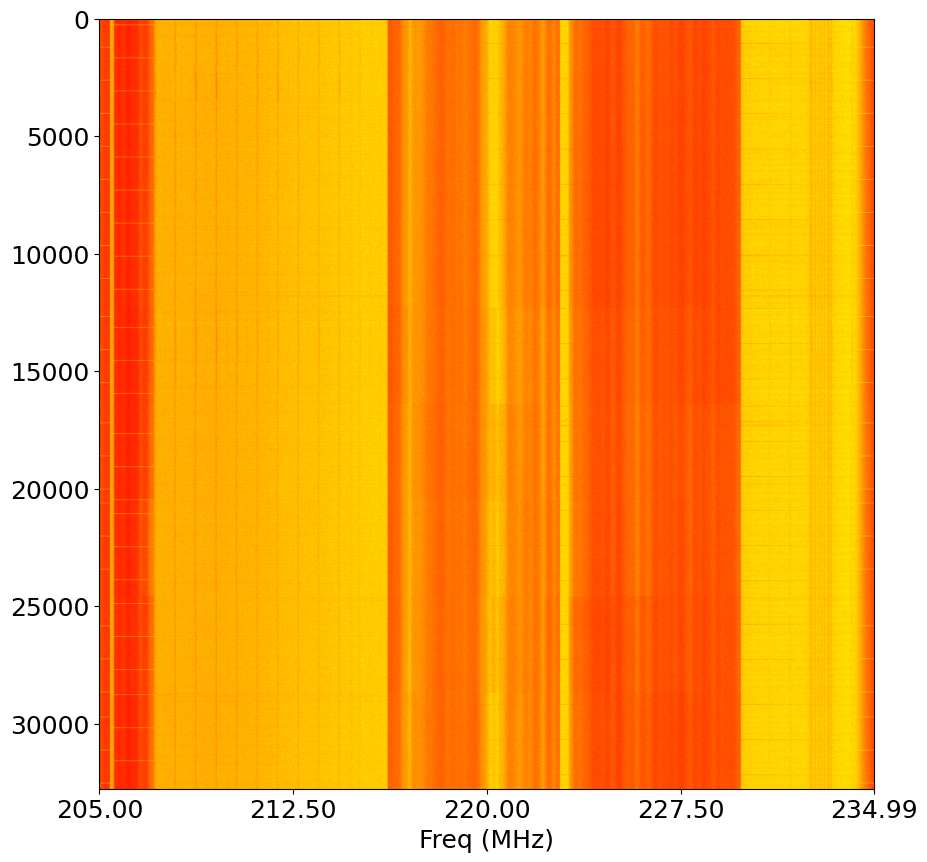

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(np.log(np.abs(auto22)), aspect='auto', cmap='jet')
xtick_indices = np.append(np.arange(0, NFFT, int(NFFT/4)), int(NFFT-1))
xlabels = [("{:.2f}".format(freqs[xtick_index]/1e6)) for xtick_index in xtick_indices]
plt.xticks(xtick_indices, xlabels)
plt.xlabel("Freq (MHz)")